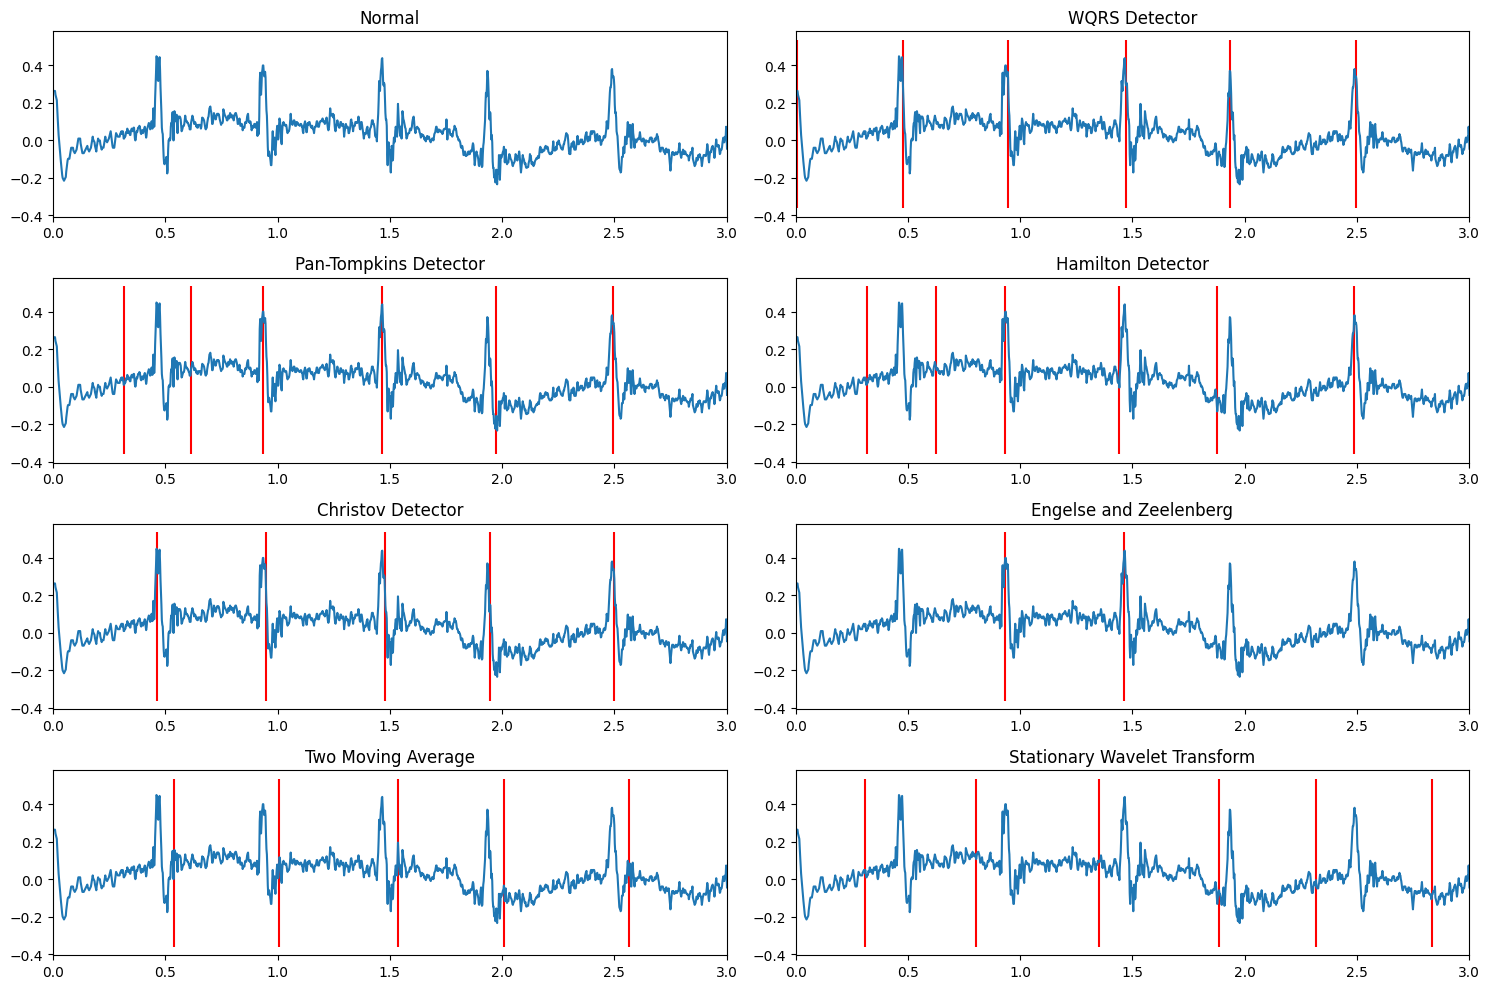

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from ecgdetectors import Detectors

from EcdDataConverter import import_mat

data = import_mat('./files/JS00001.hea', './files/JS00001.mat')
II = data.II
length = len(II)
t = 1 / data.frequency
time = np.arange(t, length * t + t, t)

detector = Detectors(data.frequency)

def plot_detector_results(ax, detector_results, title):
    ax.vlines(x=detector_results, ymin=min(II), ymax=max(II), color="r")
    ax.plot(time, II)
    ax.set_xlim(0, 3)
    ax.set_title(title)
    
detectors = [
    ("Normal", []),
    ("WQRS Detector",                [r * t for r in detector.wqrs_detector(II)]),
    ("Pan-Tompkins Detector",        [r * t for r in detector.pan_tompkins_detector(II)]),
    ("Hamilton Detector",            [r * t for r in detector.hamilton_detector(II)]),
    ("Christov Detector",            [r * t for r in detector.christov_detector(II)]),
    ("Engelse and Zeelenberg",       [r * t for r in detector.engzee_detector(II)]),
    ("Two Moving Average",           [r * t for r in detector.two_average_detector(II)]),
    ("Stationary Wavelet Transform", [r * t for r in detector.swt_detector(II)])
]
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for ax, (title, results) in zip(axs.flat, detectors):
    plot_detector_results(ax, results, title)


plt.tight_layout()
plt.show()
